<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/extracurricular/data_storage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
MIT License

Copyright (c) 2023 Victoria Firsanova

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
```

# Форматы хранения данных

В каких форматах хранить датасеты для машинного обучения и корпусной лингвистики?

Загрузим корпус, который мы собрали, и представим его тремя разными способами.

In [ ]:
!wget https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json

--2023-10-16 08:57:25--  https://raw.githubusercontent.com/vifirsanova/hse-python-course/main/extracurricular/corpus.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 263190 (257K) [text/plain]
Saving to: ‘corpus.json’

corpus.json         100%[===================>] 257.02K  --.-KB/s    in 0.005s  

2023-10-16 08:57:25 (51.0 MB/s) - ‘corpus.json’ saved [263190/263190]



Файл сохранился, его можно увидеть в меню Files

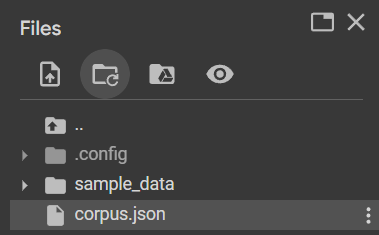

## Plain text

Допустим, нам для работы нужны только тексты статей

In [ ]:
import json

with open("corpus.json", "r", encoding="utf8") as f:
   data = json.load(f)

Выведем на экран тексты статей

In [ ]:
for day in data[:5]:
  for elem in day[:5]:
    print(elem['body'])

Причиной раздавшегося звука взрыва в Туле, напугавшего местных жителей, стал переход самолета на сверхзвуковую скорость, об этом сообщили в ГУ МЧС по Тульской области, передает РИА Новости. Ранее ряд пабликов сообщил о звуках взрыва в российском городе. Как отмечает Telegram-канал Mash, горожане услышали его около 21:42 в Пролетарском районе, а в 21:37 в районе Заречье пропал свет из-за аварии на подстанции. «Хлопки, которые слышали жители Пролетарского округа города Тулы, предположительно, явились следствием перехода самолета на сверхзвуковую скорость», — пояснили в МЧС. В ведомстве также рассказали, что электроснабжение в Зареченском районе города восстановлено, причиной стала техническая неисправность, авария ликвидирована. Ранее в единой диспетчерской службе (ЕДДС) Тулы сообщили, что в Зареченском районе почти пять тысяч человек остались без света из-за аварийного отключения электроэнергии. Электричество отключилось на улицах Заварная, Карпова, Максима Горького. Без света остались 

Сохраним эти тексты в отдельный файл *.txt

In [ ]:
text_data = open('data.txt', 'w')

for day in data:
  for elem in day:
    text_data.write(elem['body'] + '\n')

text_data.close()

Теперь у нас есть датасет, где хранятся только тексты статей

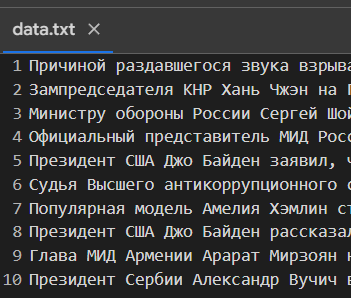

Открыть файл

`open('filename.txt', 'r')`

| Режим | Функция |
| ----- | ------- |
| r | только чтение |
| w | запись (удаляет содержимое) |
| a | append (не удаляет содержимое) |
| r+ | чтение и запись |
| w+ | чтение, запись, создает новый файл, если его еще нет |
| a+ | чтение, дозапись, создание файла |

In [ ]:
# возвращает FileNotFoundError

f = open('text.txt', 'r')

FileNotFoundError: ignored

In [ ]:
# создает пустой файл

f = open('text.txt', 'w')

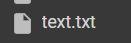

Запишем любое предложение с помощью метода `write()`

In [ ]:
f.write('This is a sample sentence.')

26

После работы файл закрывают с помощью `close()`

Освобождается память

In [ ]:
f.close()

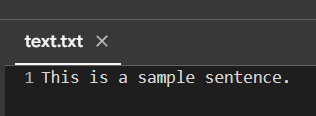

Проверим результат с помощью метода `read() `

In [ ]:
f = open('text.txt', 'r')
print(f.read())
f.close()

This is a sample sentence.


А что будет, если открыть файл в режиме `w+`?

In [ ]:
f = open('text.txt', 'w+')
print(f.read())
f.close()

Всё стерлось.

Запишем еще несколько строк.

In [ ]:
sample_list = [
    'This another sentence.',
    'This is one more sentence.',
    'Wow, here\'s one more sentence!'
]

In [ ]:
f = open('text.txt', 'w+')
f.write(sample_list)

TypeError: ignored

TypeError: метод `write()` не работает со списками, он принимает только строки

In [ ]:
f.writelines(sample_list)
f.close()

Метод `writelines` записывает данные построчно и позволяет обрабатывать списки без цикла `for`

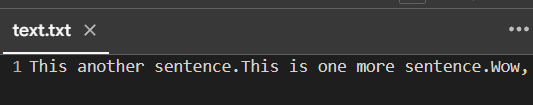

Но результат все еще нас не устраивает.

А еще мы устали закрывать файлы.

In [ ]:
# with закрывает файл автоматически
# используется вместе с open

with open('text.txt', 'a+') as f:
  f.writelines(['\n' + x for x in sample_list])

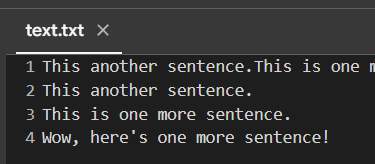

Запоминаем синтаксис

```
with open('text.txt', 'a+') as f:
  ###
```

Теперь удалим первую строчку.

In [ ]:
# чтобы воспроизвести список, мы прочитаем файл с помощью read()
# и засплитим эту историю

with open('text.txt', 'r') as f:
  sample_data = f.read().split('\n')

sample_data

["This another sentence.This is one more sentence.Wow, here's one more sentence!",
 'This another sentence.',
 'This is one more sentence.',
 "Wow, here's one more sentence!"]

In [ ]:
sample_data.remove(sample_data[0])

with open('text.txt', 'w') as f:
  f.writelines([x + '\n' for x in sample_data])

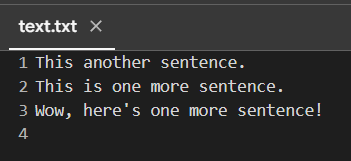

Задание: создать файл, который содержит только заголовки нашего датасета

In [ ]:
### ваш код здесь

Дискуссионные вопросы:

1. Назовите преимущества *.txt
2. Назовите недостатки *.txt
3. Для каких задач NLP датасета в формате Plain text достаточно?

## Tabular data

Текстовый формат простой, но ограниченный.

In [ ]:
import json

with open("corpus.json", "r", encoding="utf8") as f:
   data = json.load(f)

In [ ]:
for day in data[:2]:
  for element in day[:2]:
    print('HEADLINE\n', element['headline'])
    print('DESCRIPTION\n', element['description'])
    print('BODY\n', element['body'])
    print()

HEADLINE
 Жителям российского города объяснили напугавший их звук взрыва
DESCRIPTION
 Причиной раздавшегося звука взрыва в Туле, напугавшего местных жителей, стал переход самолета на сверхзвуковую скорость, об этом сообщили в ГУ МЧС по Тульской области. Ранее ряд Telegram-каналов сообщили о звуках взрыва в российском городе и об отключении света. Электроснабжение восстановлено, уточнили в ведомстве.
BODY
 Причиной раздавшегося звука взрыва в Туле, напугавшего местных жителей, стал переход самолета на сверхзвуковую скорость, об этом сообщили в ГУ МЧС по Тульской области, передает РИА Новости. Ранее ряд пабликов сообщил о звуках взрыва в российском городе. Как отмечает Telegram-канал Mash, горожане услышали его около 21:42 в Пролетарском районе, а в 21:37 в районе Заречье пропал свет из-за аварии на подстанции. «Хлопки, которые слышали жители Пролетарского округа города Тулы, предположительно, явились следствием перехода самолета на сверхзвуковую скорость», — пояснили в МЧС. В ведомстве 

In [ ]:
import pandas as pd

df = pd.DataFrame([elem for day in data for elem in day])

df

,headline,description,body
0,Жителям российского города объяснили напугавши...,"Причиной раздавшегося звука взрыва в Туле, нап...","Причиной раздавшегося звука взрыва в Туле, нап..."
1,В Китае назвали способ урегулировать конфликт ...,Зампредседателя КНР Хань Чжэн на Генассамблее ...,Зампредседателя КНР Хань Чжэн на Генассамблее ...
2,В США рассказали о показанной Шойгу в Иране «с...,Министру обороны России Сергей Шойгу в ходе ви...,Министру обороны России Сергей Шойгу в ходе ви...
3,Захарова высмеяла встречу Байдена с Зеленским,Официальный представитель МИД России Мария Зах...,Официальный представитель МИД России Мария Зах...
4,Байден подтвердил скорое прибытие танков Abram...,"Президент США Джо Байден заявил, что Украина п...","Президент США Джо Байден заявил, что Украина п..."
...,...,...,...
85,Ким Чен Ын понадеялся на развитие сотрудничест...,Лидер КНДР Ким Чен Ын в ответном послании пред...,Лидер КНДР Ким Чен Ын в ответном послании пред...
86,Самолет из Египта в российский город задержали...,Вылет самолета из египетского города Шарм-эль-...,Вылет самолета из египетского города Шарм-эль-...
87,В Германии захотели усилить пограничный контро...,Германия захотела усилить контроль на границах...,Германия захотела усилить контроль на границах...
88,Кандидат в президенты США высказался против пр...,Кандидат в президенты США и губернатор Флориды...,Кандидат в президенты США и губернатор Флориды...


In [ ]:
df.to_csv('tabular_data.csv', index=False)

Как работать с готовым датасетом?

Найдем на Kaggle подходящий вариант!

https://www.kaggle.com/datasets/grikomsn/amazon-cell-phones-reviews

In [131]:
# посмотреть датасет

df = pd.read_csv("/content/20191226-items.csv")

df.head()

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,0.0
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,0.0
2,B000SKTZ0S,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,https://m.media-amazon.com/images/I/71b+q3ydkI...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,0.0
3,B001AO4OUC,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,https://m.media-amazon.com/images/I/710UO8gdT+...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,0.0
4,B001DCJAJG,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,https://m.media-amazon.com/images/I/61LYNCVrrK...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,0.0


Нужно ли нам так много данных?

In [132]:
columns_to_drop = ['asin', 'image', 'originalPrice']

df = df.drop(columns=columns_to_drop)

df.head()

,brand,title,url,rating,reviewUrl,totalReviews,price
0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00
1,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95
2,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99
3,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00
4,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99


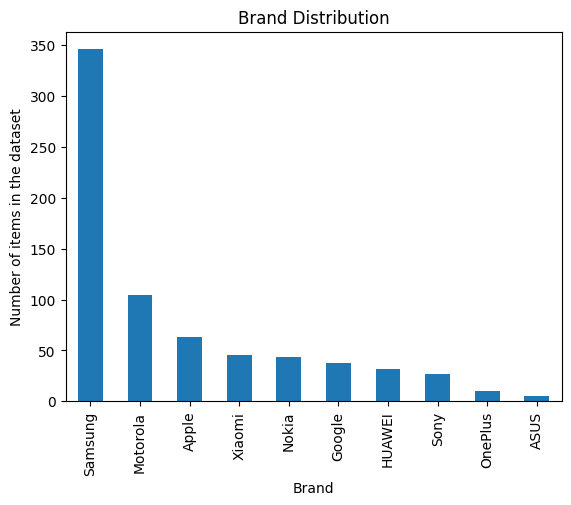

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# считаем частотность встречаемости каждого бренда в колонке brand
# отображаем результат в графике
df["brand"].value_counts().plot(kind='bar')

# подписываем
plt.xlabel("Brand")
plt.ylabel("Number of items in the dataset")
plt.title("Brand Distribution")

# отображаем
plt.show()

Делаем вывод: выборка несбалансированная

In [142]:
from sklearn.preprocessing import LabelEncoder

# инструмент для кодирования лейблов
label_encoder = LabelEncoder()

# кодируем колонку brand
df["brand_encoded"] = label_encoder.fit_transform(df["brand"])

df.head()

,brand,title,url,rating,reviewUrl,totalReviews,price,brand_encoded
0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.00,10
1,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,3.0,https://www.amazon.com/product-reviews/B0009N5L7K,7,49.95,4
2,Motorola,MOTOROLA C168i AT&T CINGULAR PREPAID GOPHONE C...,https://www.amazon.com/MOTOROLA-C168i-CINGULAR...,2.7,https://www.amazon.com/product-reviews/B000SKTZ0S,22,99.99,4
3,Motorola,Motorola i335 Cell Phone Boost Mobile,https://www.amazon.com/Motorola-i335-Phone-Boo...,3.3,https://www.amazon.com/product-reviews/B001AO4OUC,21,0.00,4
4,Motorola,Motorola V365 no contract cellular phone AT&T,https://www.amazon.com/Motorola-V365-contract-...,3.1,https://www.amazon.com/product-reviews/B001DCJAJG,12,149.99,4


Создадим коррелограмму, чтобы посмотреть наличие связи между брендом, рейтингом устройства, ценой и количеством отзывов

<ipython-input-143-0cdc791f94a5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


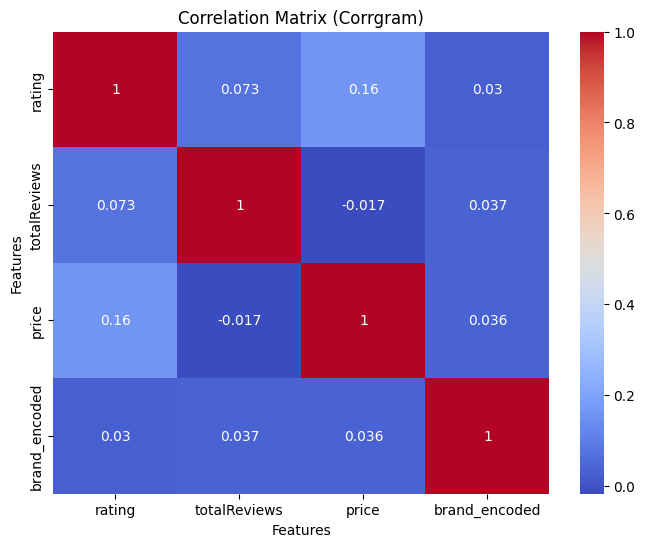

In [143]:
import seaborn as sns

# расчет корреляции
correlation_matrix = df.corr()

# создаем кореллограмму
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Matrix (Corrgram)")

plt.show()

Задание:

1. Найти на Kaggle датасет в формате csv
2. Удалить лишние колонки
3. Сделать визуализацию любых данных

## Nested format

In [150]:
from pprint import pprint

pprint(data[0][0])

{'body': 'Причиной раздавшегося звука взрыва в Туле, напугавшего местных '
         'жителей, стал переход самолета на сверхзвуковую скорость, об этом '
         'сообщили в ГУ МЧС по Тульской области, передает РИА Новости. Ранее '
         'ряд пабликов сообщил о звуках взрыва в российском городе. Как '
         'отмечает Telegram-канал Mash, горожане услышали его около 21:42 в '
         'Пролетарском районе, а в 21:37 в районе Заречье пропал свет из-за '
         'аварии на подстанции. «Хлопки, которые слышали жители Пролетарского '
         'округа города Тулы, предположительно, явились следствием перехода '
         'самолета на сверхзвуковую скорость», — пояснили в МЧС. В ведомстве '
         'также рассказали, что электроснабжение в Зареченском районе города '
         'восстановлено, причиной стала техническая неисправность, авария '
         'ликвидирована. Ранее в единой диспетчерской службе (ЕДДС) Тулы '
         'сообщили, что в Зареченском районе почти пять тысяч человек о

Выгрузим еще один датасет

https://www.kaggle.com/datasets/finalepoch/medical-ner

In [153]:
with open("Corona2.json", "r", encoding="utf8") as f:
   data = json.load(f)

In [160]:
pprint(data['examples'][9])

{'annotations': [{'correct': None,
                  'end': 124,
                  'example_id': '9a0b1ede-2282-4dae-b086-638e45881bf5',
                  'human_annotations': [{'annotator_id': 1,
                                         'name': 'Ashpat123',
                                         'reason': 'exploration',
                                         'tagged_token_id': '19770812-2605-424f-9bc4-2d451becd837',
                                         'timestamp': '2020-03-18T10:17:37.752000Z'}],
                  'id': '19770812-2605-424f-9bc4-2d451becd837',
                  'model_annotations': [],
                  'start': 116,
                  'tag_id': '2340864c-0876-4ad1-8a34-600324a516d1',
                  'tag_name': 'Pathogen',
                  'value': 'Listeria'},
                 {'correct': None,
                  'end': 170,
                  'example_id': '9a0b1ede-2282-4dae-b086-638e45881bf5',
                  'human_annotations': [{'annotator_id': 1,
  

Такие форматы хорошо подходят для решения задач с элементами извлечения информации, автоматической разметки данных

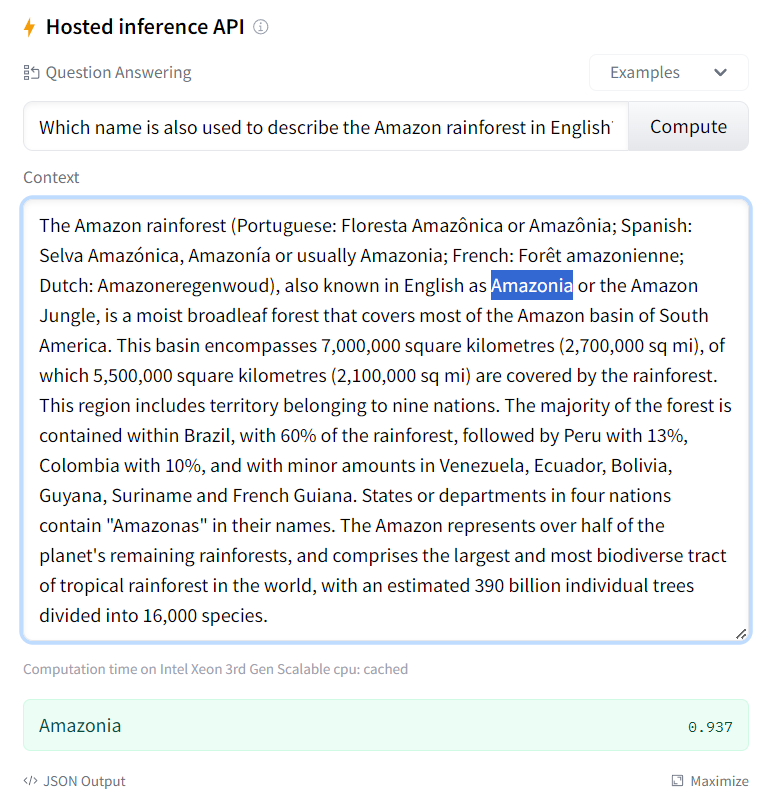

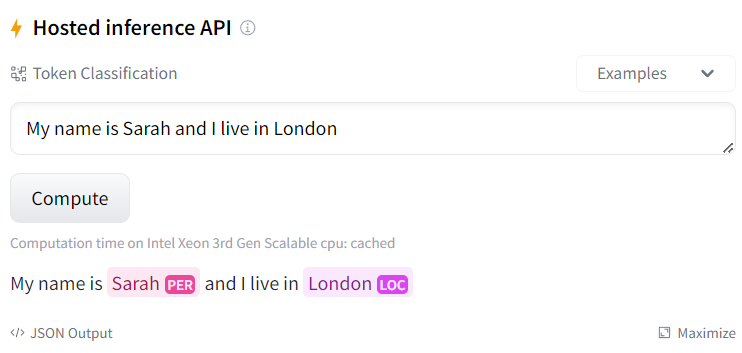